In [1]:
import graphviz

In [2]:
dot_data = '''
digraph {
    A -> B:
    A -> C;
    B -> D;
    C -> D;
    }
    '''

graph = graphviz.Source(dot_data)

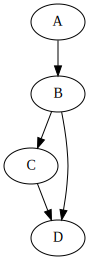

In [3]:
graph

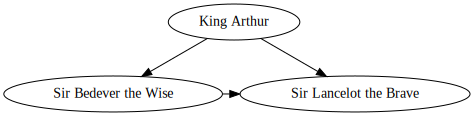

In [4]:
dot = graphviz.Digraph(comment='The Round Table')

# add nodes and edges
dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedever the Wise')
dot.node('L', 'Sir Lancelot the Brave')

dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')

# Display the graph in Jupyter lab
display(dot)

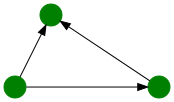

In [5]:
# Example w small green circles for nodes & specified positions

# Create a new graph
dot = graphviz.Digraph(comment='The Round Table', engine='neato')  # Use 'neato' for specifying positions

# Add nodes with specified positions, green color, and no labels
dot.node('A', '', pos='0,0!', shape='circle', width='0.3', color='green', style='filled')
dot.node('B', '', pos='2,0!', shape='circle', width='0.3', color='green', style='filled')
dot.node('L', '', pos='0.5,1!', shape='circle', width='0.3', color='green', style='filled')

# Add edges
dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')

# Display the graph in Jupyter Lab
display(dot)

In [6]:
# Example class that converts shapely object into a graphviz object                

import graphviz
from shapely.geometry import LineString, Polygon

class ShapelyToGraphviz:
    def __init__(self, geometry):
        self.geometry = geometry
        self.dot = graphviz.Digraph(engine='neato')
        
    def convert(self):
        if isinstance(self.geometry, LineString):
            coords = list(self.geometry.coords)
            for i, coord in enumerate(coords):
                self.dot.node(str(i), '', pos=f'{coord[0]},{coord[1]}!', shape='circle', width='0.3', color='green', style='filled')
                if i > 0:
                    self.dot.edge(str(i-1), str(i))
                    
        elif isinstance(self.geometry, Polygon):
            exterior = list(self.geometry.exterior.coords)
            for i, coord in enumerate(exterior[:-1]):  # Exclude the last repeated coordinate for polygons
                self.dot.node(str(i), '', pos=f'{coord[0]},{coord[1]}!', shape='circle', width='0.3', color='green', style='filled')
                if i > 0:
                    self.dot.edge(str(i-1), str(i))
            self.dot.edge(str(len(exterior)-2), '0')  # Close the polygon
        
        else:
            raise ValueError("Unsupported geometry type")
        
        return self.dot

# Example usage:
line = LineString([(0, 0), (1, 1), (2, 0)])
graph_converter = ShapelyToGraphviz(line)
dot = graph_converter.convert()
dot.view()  # This will open the graph in a viewer


'Digraph.gv.pdf'

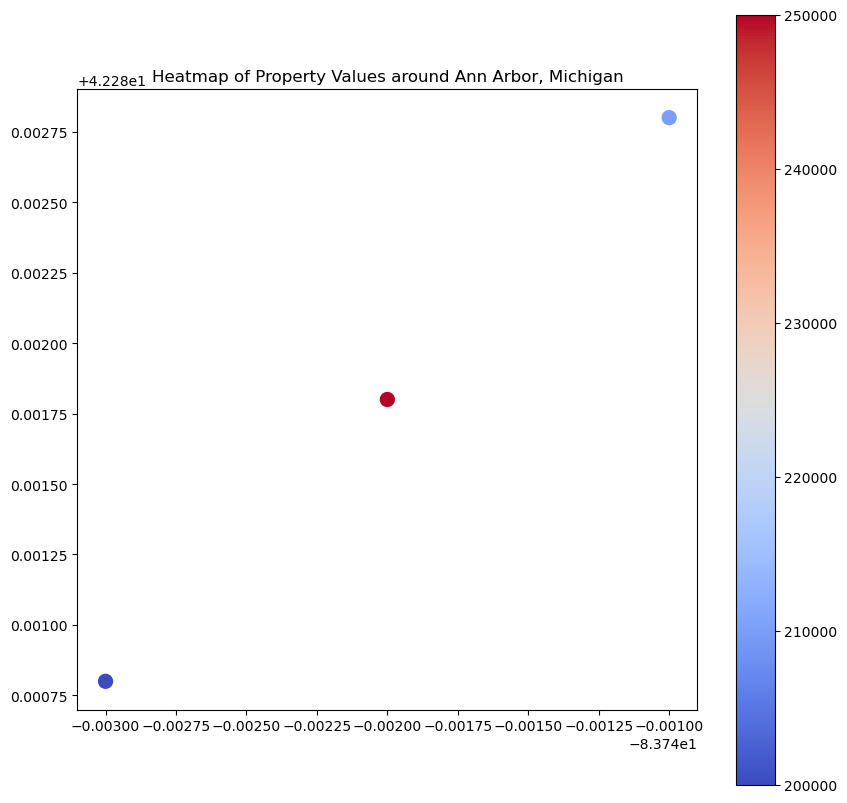

In [7]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = {
    'latitude': [42.2808, 42.2818, 42.2828],
    'longitude': [-83.7430, -83.7420, -83.7410],
    'property_value': [200000, 250000, 210000]
}

df = pd.DataFrame(data)

 Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='property_value', ax=ax, legend=True, cmap='coolwarm', markersize=100)
plt.title("Heatmap of Property Values around Ann Arbor, Michigan")
plt.show()
